In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn import datasets
%matplotlib inline

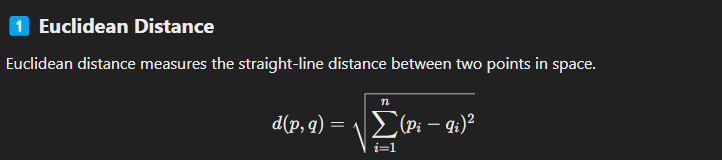

💡 When to Use Euclidean vs. Manhattan?

✅ Euclidean Distance: When the dataset is continuous and has smooth variations.

✅ Manhattan Distance: When features are discrete (like grid-based movements, text features).

In [5]:
# Eucledian distance calculate
import numpy as np
from scipy.spatial.distance import euclidean

# Sample dataset (Each row is a data point)
X = np.array([[1, 2], [3, 4], [5, 6]])

# Calculate Euclidean distance between first and second point
dist_euclidean = euclidean(X[0], X[1])
print("Euclidean Distance:", dist_euclidean)

# Alternative way using NumPy
dist_euclidean_np = np.linalg.norm(X[0] - X[1])
print("Euclidean Distance (NumPy):", dist_euclidean_np)


Euclidean Distance: 2.8284271247461903
Euclidean Distance (NumPy): 2.8284271247461903


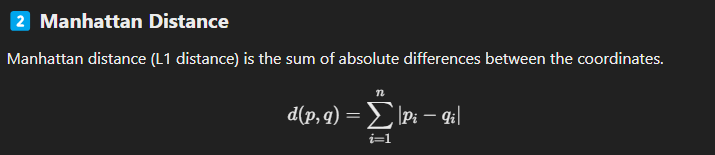

In [6]:
from scipy.spatial.distance import cityblock

# Calculate Manhattan distance between first and second point
dist_manhattan = cityblock(X[0], X[1])
print("Manhattan Distance:", dist_manhattan)

# Alternative way using NumPy
dist_manhattan_np = np.sum(np.abs(X[0] - X[1]))
print("Manhattan Distance (NumPy):", dist_manhattan_np)


Manhattan Distance: 4
Manhattan Distance (NumPy): 4


# Here we start working


In [7]:
dataset = datasets.load_iris()

In [8]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
df = pd.DataFrame(dataset['data'], columns=dataset.feature_names)

In [20]:
X = df.drop(columns='target')
y = df['target']

In [24]:
# standardrization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# sns.scatterplot(X_scaled)
# sns.boxplot(X_scaled)
# plt.scatter(X_scaled[:, 1], X_scaled[:, 2])

In [32]:
# PCA or dimentionallity reduction
from sklearn.decomposition import PCA   
pca = PCA(n_components=2)


'''
class PCA(
    n_components: Int | float | str | None = None,*,
    copy: bool = True,
    whiten: bool = False,
    svd_solver: Literal['auto', 'full', 'arpack', 'randomized'] = "auto",
    tol: Float = 0,
    iterated_power: Int | Literal['auto'] = "auto",
    n_oversamples: Int = 10,
    power_iteration_normalizer: Literal['auto', 'QR', 'LU', 'none'] = "auto",
    random_state: Int | RandomState | None = None
)
'''

'\nclass PCA(\n    n_components: Int | float | str | None = None,*,\n    copy: bool = True,\n    whiten: bool = False,\n    svd_solver: Literal[\'auto\', \'full\', \'arpack\', \'randomized\'] = "auto",\n    tol: Float = 0,\n    iterated_power: Int | Literal[\'auto\'] = "auto",\n    n_oversamples: Int = 10,\n    power_iteration_normalizer: Literal[\'auto\', \'QR\', \'LU\', \'none\'] = "auto",\n    random_state: Int | RandomState | None = None\n)\n'

In [41]:
pca_scaled = pca.fit_transform(X_scaled)

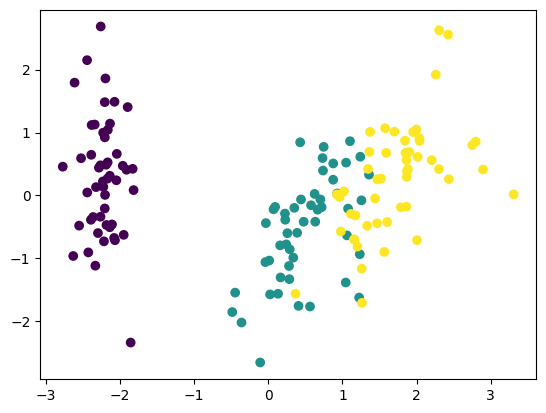

In [43]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=y)

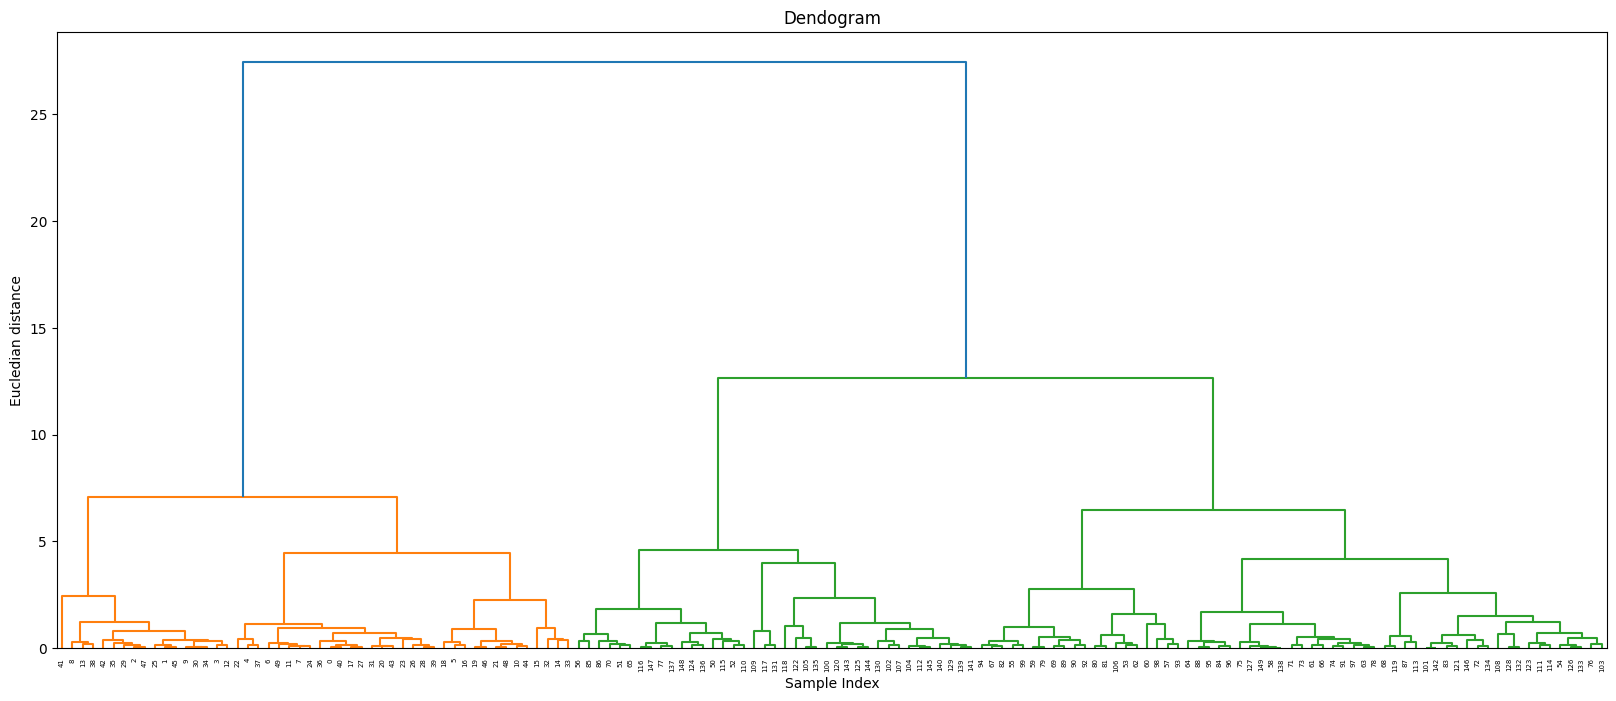

In [44]:
# Apply Aglomerrative Clustering
## Construct a Dendogram

import scipy.cluster.hierarchy as sc
# plot the dendogram
plt.figure(figsize=(20, 8))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title("Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Eucledian distance")
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',
    linkage='ward'
)

cluster.fit(pca_scaled)

'''
class AgglomerativeClustering(
    n_clusters: int | None = 2,*,
    affinity: str | ((...) -> Any) = "deprecated",
    metric: str | ((...) -> Any) | None = None,
    memory: Memory | str | None = None,
    connectivity: ArrayLike | ((...) -> Any) | None = None,
    compute_full_tree: bool | Literal['auto'] = "auto",
    linkage: Literal['ward', 'complete', 'average', 'single'] = "ward",
    distance_threshold: Float | None = None,
    compute_distances: bool = False
)
'''

'\nclass AgglomerativeClustering(\n    n_clusters: int | None = 2,*,\n    affinity: str | ((...) -> Any) = "deprecated",\n    metric: str | ((...) -> Any) | None = None,\n    memory: Memory | str | None = None,\n    connectivity: ArrayLike | ((...) -> Any) | None = None,\n    compute_full_tree: bool | Literal[\'auto\'] = "auto",\n    linkage: Literal[\'ward\', \'complete\', \'average\', \'single\'] = "ward",\n    distance_threshold: Float | None = None,\n    compute_distances: bool = False\n)\n'

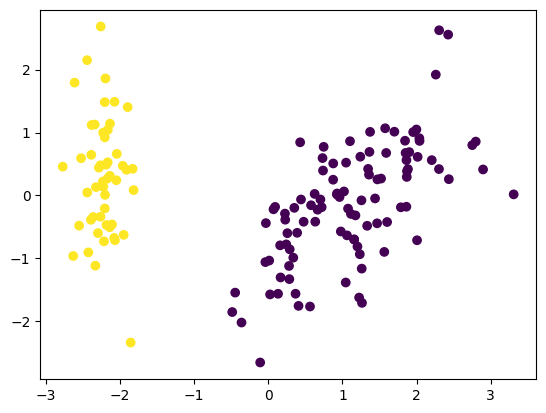

In [50]:
cluster.labels_
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)